In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
%matplotlib inline
df = pd.read_csv("40403863_features.csv")
summary = np.zeros((16, 2, 3), dtype=float)

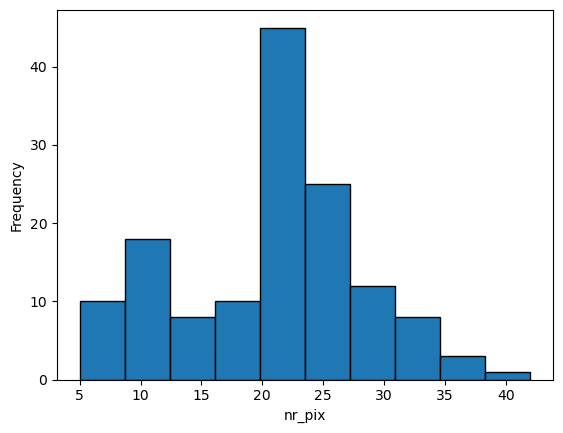

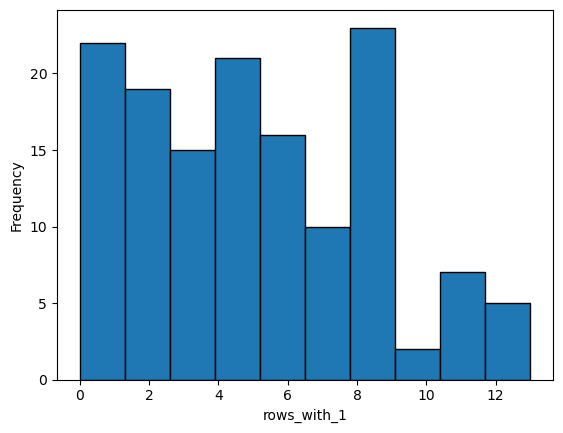

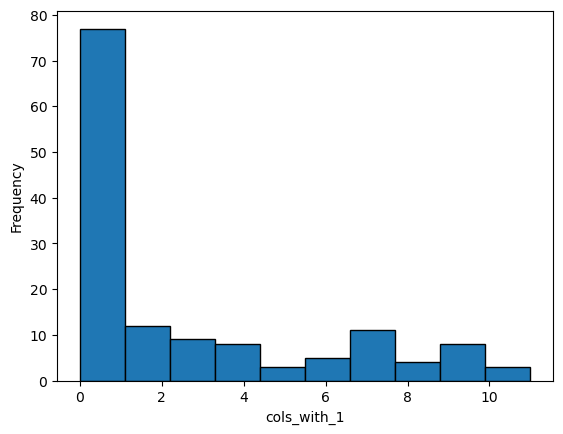

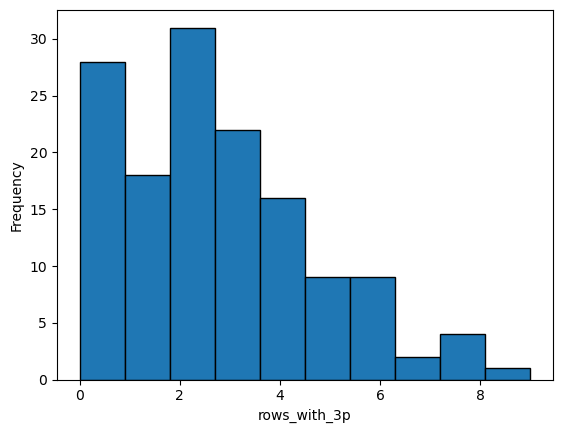

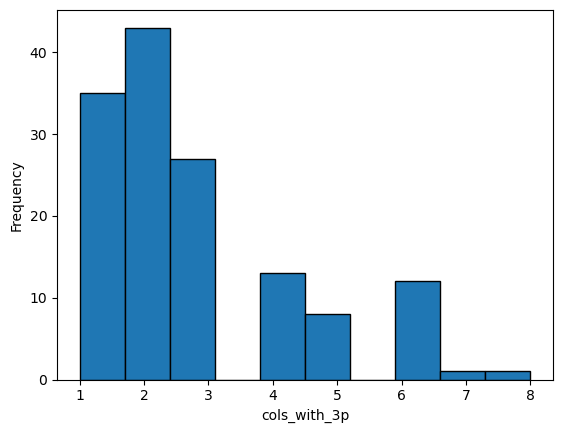

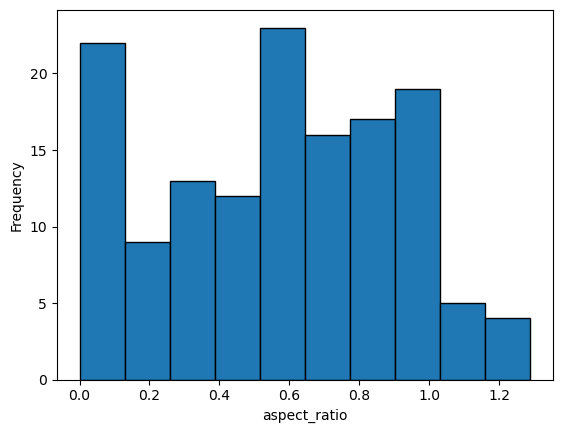

In [18]:
#section 3.1
for x in range(2,8):
    df.iloc[:, x].plot(kind="hist", edgecolor="black")
    plt.xlabel(df.iloc[:,x].name)
    plt.show()
    plt.clf()

In [21]:
#section 3.2
#struggled to figure out how to split into letters and non letters, found the filter method in the pandas documentation
for x in range (2, 18):
    column = df.columns[x]
    letters = df[column].head(80)
    non_letters = df[column].tail(60)
    
    summary[x-2, 0, 0], summary[x-2, 1, 0] = letters.mean(), non_letters.mean()
    summary[x-2, 0, 1], summary[x-2, 1, 1] = letters.median(), non_letters.median()
    summary[x-2, 0, 2], summary[x-2, 1, 2] = letters.std(), non_letters.std()
            
    print(column)
    print("MEAN -", "Letters: ", round(summary[x-2, 0, 0], 2), "Non-Letters: ", round(summary[x-2, 1, 0],2))
    print("MEDIAN -", "Letters: ", summary[x-2, 0, 1], "Non-Letters: ", summary[x-2, 1, 1])    
    print("SD -", "Letters: ", round(summary[x-2, 0, 2],2), "Non-Letters: ", round(summary[x-2, 1, 2],2))
    print("\n")

nr_pix
MEAN - Letters:  21.98 Non-Letters:  19.2
MEDIAN - Letters:  22.0 Non-Letters:  21.0
SD - Letters:  7.82 Non-Letters:  6.85


rows_with_1
MEAN - Letters:  5.26 Non-Letters:  4.8
MEDIAN - Letters:  6.0 Non-Letters:  3.0
SD - Letters:  2.99 Non-Letters:  3.72


cols_with_1
MEAN - Letters:  0.96 Non-Letters:  4.78
MEDIAN - Letters:  1.0 Non-Letters:  6.0
SD - Letters:  1.2 Non-Letters:  3.54


rows_with_3p
MEAN - Letters:  3.42 Non-Letters:  1.5
MEDIAN - Letters:  3.0 Non-Letters:  2.0
SD - Letters:  2.24 Non-Letters:  1.36


cols_with_3p
MEAN - Letters:  3.19 Non-Letters:  2.1
MEDIAN - Letters:  3.0 Non-Letters:  2.0
SD - Letters:  1.89 Non-Letters:  0.86


aspect_ratio
MEAN - Letters:  0.55 Non-Letters:  0.6
MEDIAN - Letters:  0.55 Non-Letters:  0.73
SD - Letters:  0.28 Non-Letters:  0.41


neigh_1
MEAN - Letters:  1.61 Non-Letters:  4.38
MEDIAN - Letters:  2.0 Non-Letters:  5.5
SD - Letters:  0.82 Non-Letters:  1.88


no_neigh_above
MEAN - Letters:  4.92 Non-Letters:  5.78
MEDIA

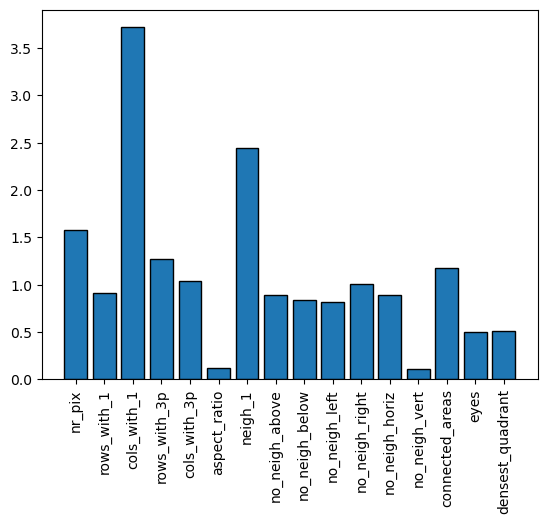

In [55]:
#section 3.3
summary_comp = np.empty((2, 16), dtype=object)
for x in range(0, 16):
    mean = summary[x, 0, 0] - summary[x, 1, 0]
    median = summary[x, 0, 1] - summary[x, 1, 1]
    sd = summary[x, 0, 2] - summary[x, 1, 2]
    avg = (mean + median + sd) / 3
    summary_comp[0,x] = df.columns[x+2]
    summary_comp[1,x] = abs(avg)
plt.bar(summary_comp[0], summary_comp[1], edgecolor="black")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#section 3.4
